In [1]:
#Try again, try not to over fit

In [2]:
#Import Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import keras 

#Initialize Neural Network as Sequential Network
from keras.models import Sequential

from keras.models import model_from_json
#Images are 2D arrays, so import Conv2D. If videos, import 3D with time as the third dimension
from keras.layers import Convolution2D

#Import Max Pooling because we need the highest value pixel from the area of interest
from keras.layers import MaxPooling2D

#Convert 2D arrays into a singular vector
from keras.layers import Flatten

#Perform full connection of neural network
from keras.layers import Dense

#Include random dropout nodes
from keras.layers import Dropout

#import image data generator library
from keras.preprocessing.image import ImageDataGenerator

#Image prepreprocessing
from keras.preprocessing import image

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ec2-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#How many count of each class in each folder?
pandas_train_count = len(os.listdir('animal_dataset/training_set/panda/'))
print('panda train pics: ' + str(pandas_train_count))
not_pandas_train_count = len(os.listdir('animal_dataset/training_set/not_panda/'))
print('not panda train pics: ' + str(not_pandas_train_count))
pandas_val_count = len(os.listdir('animal_dataset/val_set/panda/'))
print('panda val pics: ' + str(pandas_val_count))
not_pandas_val_count = len(os.listdir('animal_dataset/val_set/not_panda/'))
print('not panda val pics: ' + str(not_pandas_val_count))

panda train pics: 1079
not panda train pics: 1116
panda val pics: 277
not panda val pics: 352


In [155]:
classifier2 = Sequential()
#32 feature detectors of 3 by 3 dimensions, to create 32 feature maps
classifier2.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
#Pooling size 2 by 2, pick the largest value pixel
classifier2.add(MaxPooling2D(pool_size=(2,2)))

classifier2.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
#Pooling size 2 by 2, pick the largest value pixel
classifier2.add(MaxPooling2D(pool_size=(2,2)))

classifier2.add(Convolution2D(64,(3,3), input_shape=(64,64,3), activation='relu'))
#Pooling size 2 by 2, pick the largest value pixel
classifier2.add(MaxPooling2D(pool_size=(2,2)))

#Flatten to feed into ANN
classifier2.add(Flatten())
#128 hidden nodes in the hidden layer
classifier2.add(Dense(units = 128, activation='relu'))
# classifier2.add(Dropout(0.5))
classifier2.add(Dense(units = 1, activation='sigmoid'))
classifier2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [156]:
#rescale all pixel values between 0 and 1
#shear range to apply random tranvections, keep default
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip=True)
#rescale test dataset too
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('animal_dataset/training_set/',
                                                target_size = (64,64),
                                                batch_size = 32, 
                                                class_mode = 'binary')
test_set = test_datagen.flow_from_directory('animal_dataset/val_set/',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 2177 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [157]:
classifier2.fit_generator(training_set,
                   steps_per_epoch = 100,
                   nb_epoch = 25,
                   validation_data = test_set,
                   nb_val_samples = 100)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=100, validation_data=<keras.pre..., epochs=25, validation_steps=100)`
  """


Epoch 1/25
  2/100 [..............................] - ETA: 43s - loss: 0.6853 - acc: 0.6562 

/home/ec2-user/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100/100 [==============================] - 59s 586ms/step - loss: 0.3294 - acc: 0.8565 - val_loss: 0.4484 - val_acc: 0.8312
Epoch 2/25
100/100 [==============================] - 55s 551ms/step - loss: 0.2202 - acc: 0.9134 - val_loss: 0.3726 - val_acc: 0.8505
Epoch 3/25
100/100 [==============================] - 56s 565ms/step - loss: 0.1839 - acc: 0.9256 - val_loss: 0.2704 - val_acc: 0.8939
Epoch 4/25
100/100 [==============================] - 55s 547ms/step - loss: 0.1487 - acc: 0.9409 - val_loss: 0.3634 - val_acc: 0.8569
Epoch 5/25
100/100 [==============================] - 55s 546ms/step - loss: 0.1405 - acc: 0.9472 - val_loss: 0.4669 - val_acc: 0.8392
Epoch 6/25
100/100 [==============================] - 55s 546ms/step - loss: 0.1379 - acc: 0.9428 - val_loss: 0.3711 - val_acc: 0.8585
Epoch 7/25
100/100 [==============================] - 54s 541ms/step - loss: 0.1075 - acc: 0.9537 - val_loss: 0.1513 - val_acc: 0.9405
Epoch 8/25
100/100 [==============================] - 55s 546ms/st

In [158]:
from keras.preprocessing import image

In [159]:
#Double check accuracy
not_panda = 0
i = 0
count = 0
for folder in os.listdir('animal_dataset/val_set/'):
    if folder != '.DS_Store':
        for img in os.listdir('animal_dataset/val_set/'+folder+'/'):
            if img != '.DS_Store':
#                 print(img)
                count += 1

                image_path = 'animal_dataset/val_set/' + folder + '/' + img
                test_image = image.load_img(image_path, target_size=(64,64))
                test_image = image.img_to_array(test_image)
                test_image = np.expand_dims(test_image, axis=0)
                result = classifier2.predict(test_image)

                if result[0][0] == 1:
                    prediction = 'panda'
                elif result[0][0] == 0:
                    prediction = 'not panda'
                    not_panda += 1
                    i += 1
print('count')
print(count)
print('not pandas')
print(not_panda)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


count
627
not pandas
206


In [22]:
len(os.listdir('animal_dataset/val_set/panda/'))

277

In [160]:
#Double check accuracy
not_panda = 0
i = 0
count = 0
for x in os.listdir('animal_dataset/training_set/not_panda/'):
    count += 1
    if x != '.DS_Store':
        image_path = 'animal_dataset/training_set/not_panda/' + x
        test_image = image.load_img(image_path, target_size=(64,64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = classifier2.predict(test_image)

        if result[0][0] == 1:
            prediction = 'panda'
        elif result[0][0] == 0:
            prediction = 'not panda'
            not_panda += 1
            i += 1
print('count')
print(count)
print('not pandas')
print(not_panda)

count
1116
not pandas
763


In [161]:
# serialize model to JSON
model_json = classifier2.to_json()
with open("classifier_3_layer.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier2.save_weights("classifier_3_layer.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
for x in os.listdir('animal_dataset/training_set/not_panda/'):
    count += 1
    if x != '.DS_Store':
        image_path = 'animal_dataset/training_set/not_panda/' + x
        test_image = image.load_img(image_path, target_size=(64,64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = classifier2.predict(test_image)

        if result[0][0] == 1:
            prediction = 'panda'
        elif result[0][0] == 0:
            prediction = 'not panda'
            not_panda += 1
            i += 1

In [47]:
image1 = 'animal_dataset/training_set/not_panda/Eagle-pesticide-pardon.JPG'

In [48]:
image1_load = image.load_img(image1, target_size=(64,64))
image1_load = image.img_to_array(image1_load)
# image1_load = np.expand_dims(image1_load, axis = 0)


In [90]:
dark_count = 0
light_count = 0
count = 0
lemax = 0
for x in image1_load:
    for y in x:
        count += 1
        print(y.sum())
        if y.sum() > 600:
            dark_count += 1
        if y.sum() < 100:
            light_count += 1
            

56.0
68.0
114.0
96.0
57.0
57.0
54.0
67.0
94.0
126.0
109.0
96.0
60.0
63.0
72.0
39.0
25.0
9.0
13.0
15.0
17.0
16.0
19.0
31.0
31.0
28.0
23.0
44.0
61.0
53.0
39.0
34.0
25.0
35.0
36.0
36.0
45.0
51.0
18.0
54.0
22.0
81.0
66.0
336.0
314.0
262.0
211.0
82.0
48.0
38.0
22.0
104.0
154.0
109.0
59.0
87.0
106.0
113.0
132.0
136.0
129.0
108.0
86.0
92.0
58.0
67.0
134.0
78.0
60.0
60.0
54.0
91.0
130.0
114.0
139.0
124.0
99.0
118.0
75.0
33.0
62.0
27.0
19.0
19.0
20.0
16.0
28.0
43.0
49.0
19.0
33.0
48.0
61.0
58.0
43.0
17.0
24.0
28.0
31.0
37.0
42.0
59.0
54.0
2.0
8.0
147.0
315.0
273.0
212.0
190.0
178.0
91.0
13.0
18.0
60.0
151.0
130.0
60.0
59.0
103.0
88.0
96.0
116.0
115.0
108.0
99.0
86.0
99.0
48.0
80.0
80.0
56.0
60.0
57.0
51.0
80.0
106.0
138.0
136.0
124.0
124.0
114.0
78.0
56.0
65.0
60.0
17.0
17.0
18.0
20.0
29.0
41.0
65.0
26.0
55.0
59.0
52.0
64.0
41.0
16.0
26.0
21.0
33.0
34.0
40.0
32.0
24.0
60.0
393.0
295.0
305.0
167.0
238.0
232.0
133.0
42.0
17.0
89.0
120.0
102.0
49.0
55.0
79.0
88.0
75.0
93.0
96.0
94.0
79.0
94.0
101.

666.0
548.0
571.0
550.0
482.0
474.0
465.0
534.0
547.0
283.0
306.0
596.0
118.0
422.0
196.0
212.0
341.0
524.0
635.0
587.0
602.0
665.0
638.0
671.0
641.0
632.0
646.0
655.0
646.0
691.0
661.0
601.0
584.0
608.0
609.0
592.0
521.0
455.0
22.0
123.0
137.0
135.0
105.0
127.0
107.0
479.0
418.0
133.0
76.0
61.0
64.0
70.0
100.0
551.0
575.0
630.0
497.0
510.0
522.0
493.0
530.0
593.0
573.0
569.0
647.0
563.0
597.0
525.0
535.0
485.0
510.0
525.0
505.0
625.0
147.0
237.0
303.0
341.0
518.0
484.0
530.0
491.0
512.0
536.0
617.0
629.0
557.0
695.0
662.0
584.0
615.0
621.0
666.0
651.0
564.0
621.0
651.0
537.0
508.0
580.0
514.0
565.0
503.0
185.0
182.0
164.0
180.0
130.0
400.0
329.0
78.0
171.0
23.0
20.0
32.0
68.0
50.0
667.0
556.0
486.0
486.0
488.0
480.0
516.0
551.0
552.0
534.0
584.0
571.0
654.0
577.0
336.0
524.0
555.0
508.0
513.0
462.0
496.0
559.0
424.0
269.0
610.0
383.0
593.0
716.0
518.0
497.0
290.0
488.0
443.0
560.0
635.0
602.0
650.0
645.0
621.0
612.0
678.0
678.0
639.0
620.0
670.0
601.0
413.0
593.0
513.0
538.0
230.0
250

In [87]:
count

4096

In [89]:
lemax

765.0

In [91]:
dark_count

683

In [93]:
light_count

1360

In [57]:
# image1_load

In [72]:
image2_load = image.load_img(image1, target_size=(128,128))

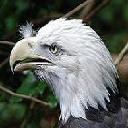

In [73]:
image2_load

In [109]:
image3 = 'animal_dataset/training_set/not_panda/Knobbilled Duck 268010.jpg'

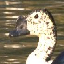

In [115]:
image3_load = image.load_img(image3, target_size=(64,64))
image3_load
# image1_load = np.expand_dims(image1_load, axis = 0)


In [116]:
image3_load = image.img_to_array(image3_load)

In [117]:
image3_load

array([[[ 96.,  90.,  78.],
        [ 94.,  92.,  80.],
        [ 87.,  87.,  77.],
        ...,
        [ 74.,  69.,  50.],
        [ 75.,  68.,  50.],
        [ 79.,  72.,  54.]],

       [[115.,  95.,  68.],
        [110.,  93.,  67.],
        [105.,  91.,  65.],
        ...,
        [102.,  94.,  75.],
        [ 97.,  89.,  70.],
        [ 98.,  87.,  69.]],

       [[141., 115.,  80.],
        [138., 114.,  80.],
        [132., 112.,  79.],
        ...,
        [137., 126., 106.],
        [141., 130., 110.],
        [149., 136., 119.]],

       ...,

       [[106.,  94.,  68.],
        [113.,  99.,  73.],
        [113.,  99.,  73.],
        ...,
        [ 57.,  67.,  77.],
        [ 63.,  75.,  87.],
        [ 54.,  67.,  76.]],

       [[114., 100.,  74.],
        [139., 125.,  99.],
        [129., 115.,  89.],
        ...,
        [ 51.,  61.,  70.],
        [ 53.,  66.,  75.],
        [ 48.,  61.,  70.]],

       [[ 95.,  83.,  57.],
        [ 95.,  81.,  54.],
        [ 99.,  

In [121]:
light_count = 0
dark_count = 0
count = 0
lemax = 0
for x in image3_load:
    for y in x:
        count += 1
        print(y.sum())
        if y.sum() > 600:
            light_count += 1
        if y.sum() < 100:
            dark_count += 1
            

264.0
266.0
251.0
239.0
245.0
262.0
266.0
250.0
259.0
247.0
255.0
295.0
316.0
352.0
301.0
270.0
245.0
246.0
259.0
225.0
201.0
214.0
200.0
197.0
199.0
189.0
202.0
198.0
203.0
194.0
205.0
216.0
206.0
197.0
191.0
191.0
191.0
195.0
189.0
204.0
201.0
202.0
196.0
192.0
195.0
201.0
205.0
207.0
225.0
220.0
235.0
251.0
248.0
258.0
231.0
222.0
214.0
211.0
208.0
195.0
205.0
193.0
193.0
205.0
278.0
270.0
261.0
261.0
310.0
440.0
508.0
431.0
352.0
309.0
265.0
251.0
237.0
243.0
249.0
266.0
266.0
252.0
286.0
303.0
281.0
251.0
224.0
270.0
300.0
303.0
291.0
288.0
293.0
272.0
275.0
266.0
269.0
257.0
248.0
250.0
259.0
252.0
251.0
248.0
239.0
236.0
239.0
245.0
239.0
247.0
250.0
256.0
271.0
265.0
268.0
262.0
261.0
267.0
282.0
314.0
311.0
302.0
323.0
319.0
307.0
271.0
256.0
254.0
336.0
332.0
323.0
320.0
323.0
402.0
543.0
522.0
474.0
434.0
445.0
445.0
466.0
509.0
509.0
508.0
485.0
453.0
416.0
404.0
350.0
312.0
257.0
296.0
325.0
340.0
327.0
325.0
331.0
312.0
318.0
297.0
288.0
276.0
264.0
267.0
279.0
281.0
265.

374.0
353.0
319.0
430.0
343.0
346.0
285.0
231.0
270.0
199.0
243.0
292.0
337.0
417.0
300.0
274.0
361.0
458.0
474.0
407.0
693.0
730.0
741.0
732.0
708.0
738.0
727.0
741.0
730.0
736.0
635.0
743.0
755.0
726.0
732.0
730.0
699.0
744.0
738.0
726.0
530.0
524.0
731.0
734.0
720.0
641.0
454.0
202.0
134.0
159.0
196.0
177.0
173.0
185.0
191.0
203.0
212.0
254.0
216.0
224.0
203.0
200.0
216.0
221.0
209.0
227.0
233.0
269.0
293.0
290.0
320.0
279.0
321.0
187.0
321.0
333.0
393.0
303.0
256.0
260.0
358.0
452.0
454.0
476.0
733.0
740.0
733.0
726.0
726.0
740.0
707.0
741.0
736.0
719.0
704.0
752.0
756.0
752.0
728.0
724.0
654.0
738.0
749.0
702.0
482.0
709.0
720.0
725.0
607.0
580.0
333.0
297.0
184.0
237.0
239.0
221.0
243.0
243.0
237.0
231.0
237.0
207.0
223.0
214.0
230.0
248.0
248.0
258.0
241.0
229.0
226.0
208.0
214.0
217.0
226.0
250.0
202.0
265.0
507.0
360.0
324.0
252.0
175.0
255.0
491.0
532.0
402.0
392.0
678.0
741.0
719.0
743.0
720.0
744.0
740.0
740.0
727.0
737.0
589.0
744.0
736.0
613.0
663.0
732.0
742.0
751.0
728.

In [122]:
dark_count

8

In [123]:
light_count

936

In [142]:
image4 = 'animal_dataset/training_set/not_panda/Yellowbilled Duck 268012.jpg'

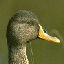

In [143]:
image4_load = image.load_img(image4, target_size=(64,64))
image4_load



In [144]:
image4_load = image.img_to_array(image4_load)

In [145]:
light_count = 0
dark_count = 0
count = 0
lemax = 0
for x in image4_load:
    for y in x:
        count += 1
#         print(y.sum())
        if y.sum() > 600:
            light_count += 1
        if y.sum() < 100:
            dark_count += 1
print(dark_count)
print(light_count)

124
47


In [151]:
image5 = 'animal_dataset/training_set/panda/100. rbqlavmie0maf50caac4pzxb_r4060.jpg'

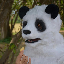

In [152]:
image5_load = image.load_img(image5, target_size=(64,64))
image5_load



In [153]:
image5_load = image.img_to_array(image5_load)

In [154]:
light_count = 0
dark_count = 0
count = 0
lemax = 0
for x in image5_load:
    for y in x:
        count += 1
#         print(y.sum())
        if y.sum() > 600:
            light_count += 1
        if y.sum() < 100:
            dark_count += 1
print(dark_count)
print(light_count)

587
0
